Set Up

In [ ]:
!pip install -q sentencepiece
!pip install -q transformers
!pip install -q evaluate
!pip install -q rouge_score

import evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 53.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupt

In [ ]:
!pip install -q transformers datasets
!pip install -q peft
!pip install -q accelerate
!pip install -U bitsandbytes
!pip install sacrebleu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 11.6 MB/s eta 0:00:00


In [ ]:
#let's make longer output readable without horizontal scrolling
from pprint import pprint
import os

# List files in the /content directory
print(os.listdir('/content'))

['.config', 'sample_data']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load CSV files (assuming they are in Google Drive or uploaded to Colab)
discharge_df = pd.read_csv('/content/drive/MyDrive/w266_project_data/discharge.csv.gz', compression='gzip')

In [ ]:
discharge_df.head()

,note_id,subject_id,hadm_id,note_type,note_seq,charttime,storetime,text
0,10000032-DS-21,10000032,22595853,DS,21,2180-05-07 00:00:00,2180-05-09 15:26:00,\nName: ___ Unit No: _...
1,10000032-DS-22,10000032,22841357,DS,22,2180-06-27 00:00:00,2180-07-01 10:15:00,\nName: ___ Unit No: _...
2,10000032-DS-23,10000032,29079034,DS,23,2180-07-25 00:00:00,2180-07-25 21:42:00,\nName: ___ Unit No: _...
3,10000032-DS-24,10000032,25742920,DS,24,2180-08-07 00:00:00,2180-08-10 05:43:00,\nName: ___ Unit No: _...
4,10000084-DS-17,10000084,23052089,DS,17,2160-11-25 00:00:00,2160-11-25 15:09:00,\nName: ___ Unit No: __...


We will need to subset the data because of the immense number of rows and text contained within each row for ease of processing

In [ ]:
def clean_text(text):
    text = text.replace('\n', ' ')
    text = ' '.join(text.split())
    return text

sample_size = 10000

discharge_sample = discharge_df.sample(n=sample_size, random_state=42)
discharge_sample['cleaned_text'] = discharge_sample['text'].apply(clean_text)

print(discharge_sample.head())

               note_id  subject_id   hadm_id note_type  note_seq  \
6292    10202247-DS-15    10202247  28736349        DS        15   
92111   12784119-DS-19    12784119  27383409        DS        19   
209235   16314105-DS-3    16314105  27871553        DS         3   
225051  16805731-DS-23    16805731  24081862        DS        23   
143620  14334225-DS-10    14334225  29709912        DS        10   

                  charttime            storetime  \
6292    2173-11-11 00:00:00  2173-11-15 13:25:00   
92111   2196-11-13 00:00:00  2196-11-14 19:33:00   
209235  2141-05-10 00:00:00  2141-06-02 15:28:00   
225051  2149-10-14 00:00:00  2149-10-14 15:27:00   
143620  2154-09-26 00:00:00  2154-09-26 16:07:00   

                                                     text  \
6292     \nName:  ___                    Unit No:   __...   
92111    \nName:  ___                 Unit No:   ___\n...   
209235   \nName:  ___                   Unit No:   ___...   
225051   \nName:  ___.            

In [ ]:
# Looking at the first row entry of the discharge description.
# Note at the bottom of the description is a prescribed discharge diagnosis (instructions) which is what we want to evaluate against
discharge_sample.iloc[0]['cleaned_text']

"Name: ___ Unit No: ___ Admission Date: ___ Discharge Date: ___ Date of Birth: ___ Sex: F Service: MEDICINE Allergies: Anticholinergics,Other / Reglan Attending: ___. Chief Complaint: Abdominal pain Major Surgical or Invasive Procedure: None History of Present Illness: Patient is a ___ yo woman with history of chronic pancreatitis s/p cholecystectomy and sphincterotomy who presents with 1wk of worsening abdominal pain. As per patient, the pain is intermittent, sharp and ___ in quality. It localizes to her mid/righ upper abdomen and radiates up the chest wall and to the back. Patient finds this pain to be very similar to her prior pancreatitis flare-ups. Denies precipitants including alcohol use, abd. trauma, infections or h/o gallstones. She notes that she is on a restricted diet (no caffeine/fatty food/fried food/dairy) as part of her pancreatitis management. Also notes that pain worsens with meals; and that it is alleviated when NPO, or with NSAIDs and dilaudid. . Patient was initall

In [ ]:
instructions = discharge_sample.iloc[0]['cleaned_text'].split("Discharge Instructions:")
instructions = ' '.join(instruction.strip() for instruction in instructions[1:] if instruction.strip())
instructions

'You were admitted to the hospital because of abdominal pain and inibility to eat secondary to pain. You were given IV pain medication and fluids. Over the course of your stay you were slowly able to eat more starting with fluids first. You tolerated a low residue diet with your baseline amount of pain. You were seen by the ___ doctors in the hospital who recommended tests to be sent out to look for a cause of your pain. No cause could be found. Medication changes: You were started on Omeprazole 20mg once a day. Remember to avoid dairy products and try to eat a low residue bland diet. Your appointment with Dr. ___ was changed to ___ at 11am. Please return to the hospital or call your doctor if you have temperature greater than 101, shortness of breath, worsening difficulty with swallowing, chest pain, abdominal pain, diarrhea, or any other symptoms that you are concerned about. Followup Instructions: ___'

In [ ]:
# Use function to split for entire dataset
import re

def extract_sections(text):
    # Regex to match the discharge instructions section
    discharge_pattern = re.compile(r"Discharge Instructions:(.*)", re.DOTALL)
    match = discharge_pattern.search(text)
    if match:
        discharge_summary = match.group(1).strip()
        # Removing the discharge instructions part from the original text
        rest_of_text = text[:match.start()] + text[match.end():]
        return rest_of_text.strip(), discharge_summary
    return None, None

input_texts = []
output_texts = []

for index, row in discharge_sample.iterrows():
    input_text, discharge_instructions = extract_sections(row['cleaned_text'])
    if input_text and discharge_instructions:
        input_texts.append(input_text)
        output_texts.append(discharge_instructions)

In [ ]:
input_texts

In [ ]:
output_texts[0]

'You were admitted to the hospital because of abdominal pain and inibility to eat secondary to pain. You were given IV pain medication and fluids. Over the course of your stay you were slowly able to eat more starting with fluids first. You tolerated a low residue diet with your baseline amount of pain. You were seen by the ___ doctors in the hospital who recommended tests to be sent out to look for a cause of your pain. No cause could be found. Medication changes: You were started on Omeprazole 20mg once a day. Remember to avoid dairy products and try to eat a low residue bland diet. Your appointment with Dr. ___ was changed to ___ at 11am. Please return to the hospital or call your doctor if you have temperature greater than 101, shortness of breath, worsening difficulty with swallowing, chest pain, abdominal pain, diarrhea, or any other symptoms that you are concerned about. Followup Instructions: ___'

In [ ]:
all_input_texts = ' '.join(input_texts)

In [ ]:
!pip install wordcloud matplotlib

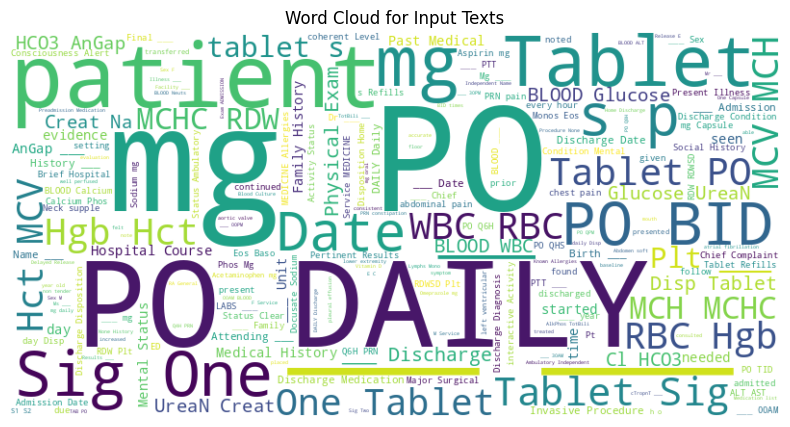

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_original = WordCloud(width=800, height=400, background_color ='white').generate(all_input_texts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Input Texts')
plt.show()

In [ ]:
# Split into train validation test sets
from datasets import Dataset
dataset = []

for input_text, output_text in zip(input_texts, output_texts):
    dataset.append({
        "input": input_text,
        "output": output_text
    })

dataset = Dataset.from_list(dataset)
train_test_dataset = dataset.train_test_split(test_size=0.2)
test_valid = train_test_dataset['test'].train_test_split(test_size=0.5)
train = train_test_dataset["train"]
valid = test_valid["train"]
test = test_valid["test"]

In [ ]:
train

Dataset({
    features: ['input', 'output'],
    num_rows: 7940
})

In [ ]:
test

Dataset({
    features: ['input', 'output'],
    num_rows: 993
})

In [ ]:
from transformers import BitsAndBytesConfig
import torch

nf4_config = BitsAndBytesConfig(
   load_in_4bit=True,
   bnb_4bit_quant_type="nf4",
   bnb_4bit_use_double_quant=True,
   bnb_4bit_compute_dtype=torch.bfloat16
)

In [ ]:
train[0]['input']

"Name: ___ Unit No: ___ Admission Date: ___ Discharge Date: ___ Date of Birth: ___ Sex: M Service: SURGERY Allergies: Patient recorded as having No Known Allergies to Drugs Attending: ___. Chief Complaint: In stent stenosis Major Surgical or Invasive Procedure: Angioplasty renal artery stent of transplanted kidney History of Present Illness: ___ M s/p renal transplant ___ patient with txp renal artery stent ___, now with in stent stenosis. Patient has recenlty had elevated blood pressure and was scheduled for transplant kidney ultrasound. Patient underwent renal ultrasound on ___ which demonstrated Significantly elevated renal artery velocities compared to ___ with renal artery velocities of 433 and 464 cm/sec. The transplant resistive indices varied from 0.77 to 0.79. It was determined that this was a result of significant restenosis and he is now admitted for angiogram with CO2 and pre-operative administration of bicarb and perioperative mucomyst. Past Medical History: ERSD now s/p l

In [ ]:
train

Dataset({
    features: ['input', 'output'],
    num_rows: 7940
})

### Import T5 for baseline modeling

In [ ]:
from transformers import T5Tokenizer, TFT5ForConditionalGeneration

t5model = TFT5ForConditionalGeneration.from_pretrained("t5-base")
t5tokenizer = T5Tokenizer.from_pretrained("t5-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
t5model.summary()

Model: "tft5_for_conditional_generation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  24674304  
                                                                 
 encoder (TFT5MainLayer)     multiple                  109628544 
                                                                 
 decoder (TFT5MainLayer)     multiple                  137949312 
                                                                 
Total params: 222903552 (850.31 MB)
Trainable params: 222903552 (850.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("t5-base")

config

T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
   

In [ ]:
import sacrebleu

In [ ]:
PROMPT = 'summarize: '

# Function to generate discharge summary
def generate_discharge_summary(tokenizer, model, input_text, max_input_length=512):
    if not input_text:
        return ""
    # Tokenize the input text with truncation
    inputs = tokenizer(PROMPT + input_text, return_tensors='pt', truncation=True, padding='longest', max_length=max_input_length)
    # Generate summary
    summary_ids = model.generate(inputs["input_ids"], max_length=200, num_beams=4, length_penalty=2.0, early_stopping=True)
    # Decode the generated summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)
    return summary


# Convert Hugging Face Dataset to list of dictionaries
train_list = train.to_dict()

generated_summaries = []
reference_summaries = []

num_examples = 10

for i in range(num_examples):
    input_text = train_list['input'][i]
    reference_summary = train_list['output'][i]

    generated_summary = generate_discharge_summary(t5tokenizer, t5model, input_text)

    generated_summaries.append(generated_summary)
    reference_summaries.append(reference_summary)

# Compute BLEU scores
bleu = sacrebleu.corpus_bleu(generated_summaries, [reference_summaries])
print("\n👉  BLEU Score:", bleu.score)

# Compare some examples
for i in range(5):
    print(f"\nExample {i + 1}:")
    print("Input Text:", train_list['input'][i])
    print("Generated Summary:", generated_summaries[i])
    print("Reference Summary:", reference_summaries[i])


👉  BLEU Score: 0.08530287476179226

Example 1:
Input Text: Name: ___ Unit No: ___ Admission Date: ___ Discharge Date: ___ Date of Birth: ___ Sex: M Service: SURGERY Allergies: Patient recorded as having No Known Allergies to Drugs Attending: ___. Chief Complaint: In stent stenosis Major Surgical or Invasive Procedure: Angioplasty renal artery stent of transplanted kidney History of Present Illness: ___ M s/p renal transplant ___ patient with txp renal artery stent ___, now with in stent stenosis. Patient has recenlty had elevated blood pressure and was scheduled for transplant kidney ultrasound. Patient underwent renal ultrasound on ___ which demonstrated Significantly elevated renal artery velocities compared to ___ with renal artery velocities of 433 and 464 cm/sec. The transplant resistive indices varied from 0.77 to 0.79. It was determined that this was a result of significant restenosis and he is now admitted for angiogram with CO2 and pre-operative administration of bicarb and p

In [ ]:
# Load ROUGE metric
rouge = evaluate.load('rouge')

# Calculate ROUGE scores
results = rouge.compute(predictions=generated_summaries, references=reference_summaries)

print("\n👉  ROUGE Scores:", results)

# Compare some examples
for i in range(5):
    print(f"\nExample {i + 1}:")
    print("Input Text:", train_list['input'][i])
    print("Generated Summary:", generated_summaries[i])
    print("Reference Summary:", reference_summaries[i])


👉  ROUGE Scores: {'rouge1': 0.07337345408579346, 'rouge2': 0.0029467578048145817, 'rougeL': 0.05652110993159021, 'rougeLsum': 0.05625297420988072}

Example 1:
Input Text: Name: ___ Unit No: ___ Admission Date: ___ Discharge Date: ___ Date of Birth: ___ Sex: M Service: SURGERY Allergies: Patient recorded as having No Known Allergies to Drugs Attending: ___. Chief Complaint: In stent stenosis Major Surgical or Invasive Procedure: Angioplasty renal artery stent of transplanted kidney History of Present Illness: ___ M s/p renal transplant ___ patient with txp renal artery stent ___, now with in stent stenosis. Patient has recenlty had elevated blood pressure and was scheduled for transplant kidney ultrasound. Patient underwent renal ultrasound on ___ which demonstrated Significantly elevated renal artery velocities compared to ___ with renal artery velocities of 433 and 464 cm/sec. The transplant resistive indices varied from 0.77 to 0.79. It was determined that this was a result of signi

In [ ]:
# Pegasus and LORA
# T5 and BART

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

model_name = "facebook/bart-base"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
    inputs = examples["input"]
    targets = examples["output"]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    # Tokenize targets with the same parameters
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=512, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train_dataset = train.map(tokenize_function, batched=True)
tokenized_valid_dataset = valid.map(tokenize_function, batched=True)

Map:   0%|          | 0/7940 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/992 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import Trainer, TrainingArguments

# Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=1,  # Set batch size to 1
    per_device_eval_batch_size=1,  # Set batch size to 1
    gradient_accumulation_steps=16,  # Simulate a larger batch size
    eval_accumulation_steps=2,
    do_train=True,
    do_eval=True,
    logging_steps=500,
    save_steps=500,
    eval_steps=500,
    num_train_epochs=2,
    eval_strategy="steps",
    save_total_limit=3,
    fp16=True,  # Use mixed precision training
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_valid_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
500,1.473000,0.801016


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


TrainOutput(global_step=992, training_loss=1.1573972086752615, metrics={'train_runtime': 843.1647, 'train_samples_per_second': 18.834, 'train_steps_per_second': 1.177, 'total_flos': 4838868532592640.0, 'train_loss': 1.1573972086752615, 'epoch': 1.998992443324937})

In [ ]:
results = trainer.evaluate()
print("Evaluation results:", results)

Evaluation results: {'eval_loss': 0.7490500211715698, 'eval_runtime': 21.2872, 'eval_samples_per_second': 46.601, 'eval_steps_per_second': 46.601, 'epoch': 1.998992443324937}


In [ ]:
#Extreme summarization versino of BART, xsum
#Do we need any standard NLTK preprocessing

Check saved model

In [ ]:
import os

model_dir = "./results"

# List the contents of the directory
if os.path.exists(model_dir):
    print("Model directory contents:", os.listdir(model_dir))
else:
    print("Model directory does not exist.")

Model directory contents: ['checkpoint-992', 'checkpoint-500', 'runs']


Want to test on specific sample from fine-tuned model

In [ ]:
test[0]['input']

'Name: ___ Unit No: ___ Admission Date: ___ Discharge Date: ___ Date of Birth: ___ Sex: F Service: MEDICINE Allergies: atorvastatin Attending: ___. Chief Complaint: Fatigue Major Surgical or Invasive Procedure: None History of Present Illness: ___ year old female transferred from ___ with shock. Per ED dashboard, the patient presented from a nursing home with generalized weakness. At ___, she was noted to be febrile to 102.7 and hypotensive to 62/43. A CXR was consistent with possible pneumonia. A CT C/A/P showed a left lower lobe opacity with small bilateral pleural effusion and pericardial effusion. It also noted small ascites throughout the abdomen and pelvis. She was hypoxemic to the ___ and required 3L NC. She received 2L IVF and remained hypotensive. She was given dopamine, started on IV vancomycin and zosyn, and transferred to ___ as there were no ICU beds available at ___. Upon arrival to ___, she was noted to have generalized rhonchi bilaterally. Her BP nadired at 73/39, promp

In [ ]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration, Trainer

# Function to generate a summary
def generate_summary(input_text, tokenizer, model, max_length=512):
    # Tokenize the input text
    inputs = tokenizer(input_text, max_length=max_length, truncation=True, padding="max_length", return_tensors="pt")
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    # Generate summary
    summary_ids = model.generate(inputs["input_ids"], attention_mask=inputs["attention_mask"], max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)
    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)
    return summary

input_text = input_texts[0]

# Generate the summary
summary = generate_summary(input_text, tokenizer, model)

# Print the input and generated summary
print("Input Text:", input_text)
print("\nGenerated Summary:", summary)

Input Text: Name: ___ Unit No: ___ Admission Date: ___ Discharge Date: ___ Date of Birth: ___ Sex: F Service: MEDICINE Allergies: Anticholinergics,Other / Reglan Attending: ___. Chief Complaint: Abdominal pain Major Surgical or Invasive Procedure: None History of Present Illness: Patient is a ___ yo woman with history of chronic pancreatitis s/p cholecystectomy and sphincterotomy who presents with 1wk of worsening abdominal pain. As per patient, the pain is intermittent, sharp and ___ in quality. It localizes to her mid/righ upper abdomen and radiates up the chest wall and to the back. Patient finds this pain to be very similar to her prior pancreatitis flare-ups. Denies precipitants including alcohol use, abd. trauma, infections or h/o gallstones. She notes that she is on a restricted diet (no caffeine/fatty food/fried food/dairy) as part of her pancreatitis management. Also notes that pain worsens with meals; and that it is alleviated when NPO, or with NSAIDs and dilaudid. . Patient 

In [ ]:
output_texts[0]

'You were admitted to the hospital because of abdominal pain and inibility to eat secondary to pain. You were given IV pain medication and fluids. Over the course of your stay you were slowly able to eat more starting with fluids first. You tolerated a low residue diet with your baseline amount of pain. You were seen by the ___ doctors in the hospital who recommended tests to be sent out to look for a cause of your pain. No cause could be found. Medication changes: You were started on Omeprazole 20mg once a day. Remember to avoid dairy products and try to eat a low residue bland diet. Your appointment with Dr. ___ was changed to ___ at 11am. Please return to the hospital or call your doctor if you have temperature greater than 101, shortness of breath, worsening difficulty with swallowing, chest pain, abdominal pain, diarrhea, or any other symptoms that you are concerned about. Followup Instructions: ___'

In [ ]:
model_name1 = "facebook/bart-large-xsum"
tokenizer = BartTokenizer.from_pretrained(model_name1)
model = BartForConditionalGeneration.from_pretrained(model_name1)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

In [ ]:
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
# Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=1,  # Set batch size to 1
    per_device_eval_batch_size=1,  # Set batch size to 1
    gradient_accumulation_steps=16,  # Simulate a larger batch size
    eval_accumulation_steps=2,
    do_train=True,
    do_eval=True,
    logging_steps=500,
    save_steps=500,
    eval_steps=500,
    num_train_epochs=2,
    eval_strategy="steps",
    save_total_limit=3,
    fp16=True,  # Use mixed precision training
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_valid_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
500,0.864800,0.621256


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


TrainOutput(global_step=992, training_loss=0.7190143216040826, metrics={'train_runtime': 1619.9472, 'train_samples_per_second': 9.803, 'train_steps_per_second': 0.612, 'total_flos': 1.7198142122360832e+16, 'train_loss': 0.7190143216040826, 'epoch': 1.998992443324937})

In [ ]:
results = trainer.evaluate()
print("Evaluation results:", results)

Evaluation results: {'eval_loss': 0.5797985792160034, 'eval_runtime': 37.1565, 'eval_samples_per_second': 26.698, 'eval_steps_per_second': 26.698, 'epoch': 1.998992443324937}


In [ ]:
# Convert Hugging Face Dataset to list of dictionaries
train_list = train.to_dict()

generated_summaries = []
reference_summaries = []

num_examples = 10

for i in range(num_examples):
    input_text = train_list['input'][i]
    reference_summary = train_list['output'][i]

    generated_summary = generate_discharge_summary(t5tokenizer, t5model, input_text)

    generated_summaries.append(generated_summary)
    reference_summaries.append(reference_summary)

In [ ]:
import os

model_dir = "./results"

# List the contents of the directory
if os.path.exists(model_dir):
    print("Model directory contents:", os.listdir(model_dir))
else:
    print("Model directory does not exist.")

Model directory contents: ['checkpoint-992', 'checkpoint-500', 'runs']


In [ ]:
test[0]['input']

'Name: ___ Unit No: ___ Admission Date: ___ Discharge Date: ___ Date of Birth: ___ Sex: F Service: MEDICINE Allergies: atorvastatin Attending: ___. Chief Complaint: Fatigue Major Surgical or Invasive Procedure: None History of Present Illness: ___ year old female transferred from ___ with shock. Per ED dashboard, the patient presented from a nursing home with generalized weakness. At ___, she was noted to be febrile to 102.7 and hypotensive to 62/43. A CXR was consistent with possible pneumonia. A CT C/A/P showed a left lower lobe opacity with small bilateral pleural effusion and pericardial effusion. It also noted small ascites throughout the abdomen and pelvis. She was hypoxemic to the ___ and required 3L NC. She received 2L IVF and remained hypotensive. She was given dopamine, started on IV vancomycin and zosyn, and transferred to ___ as there were no ICU beds available at ___. Upon arrival to ___, she was noted to have generalized rhonchi bilaterally. Her BP nadired at 73/39, promp

In [ ]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration, Trainer

# Function to generate a summary
def generate_summary(input_text, tokenizer, model, max_length=512):
    # Tokenize the input text
    inputs = tokenizer(input_text, max_length=max_length, truncation=True, padding="max_length", return_tensors="pt")
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    # Generate summary
    summary_ids = model.generate(inputs["input_ids"], attention_mask=inputs["attention_mask"], max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)
    # Decode the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)
    return summary

input_text = input_texts[0]

# Generate the summary
summary = generate_summary(input_text, tokenizer, model)

# Print the input and generated summary
print("Input Text:", input_text)
print("\nGenerated Summary:", summary)

Input Text: Name: ___ Unit No: ___ Admission Date: ___ Discharge Date: ___ Date of Birth: ___ Sex: F Service: MEDICINE Allergies: Anticholinergics,Other / Reglan Attending: ___. Chief Complaint: Abdominal pain Major Surgical or Invasive Procedure: None History of Present Illness: Patient is a ___ yo woman with history of chronic pancreatitis s/p cholecystectomy and sphincterotomy who presents with 1wk of worsening abdominal pain. As per patient, the pain is intermittent, sharp and ___ in quality. It localizes to her mid/righ upper abdomen and radiates up the chest wall and to the back. Patient finds this pain to be very similar to her prior pancreatitis flare-ups. Denies precipitants including alcohol use, abd. trauma, infections or h/o gallstones. She notes that she is on a restricted diet (no caffeine/fatty food/fried food/dairy) as part of her pancreatitis management. Also notes that pain worsens with meals; and that it is alleviated when NPO, or with NSAIDs and dilaudid. . Patient 

In [ ]:
output_texts[0]

'You were admitted to the hospital because of abdominal pain and inibility to eat secondary to pain. You were given IV pain medication and fluids. Over the course of your stay you were slowly able to eat more starting with fluids first. You tolerated a low residue diet with your baseline amount of pain. You were seen by the ___ doctors in the hospital who recommended tests to be sent out to look for a cause of your pain. No cause could be found. Medication changes: You were started on Omeprazole 20mg once a day. Remember to avoid dairy products and try to eat a low residue bland diet. Your appointment with Dr. ___ was changed to ___ at 11am. Please return to the hospital or call your doctor if you have temperature greater than 101, shortness of breath, worsening difficulty with swallowing, chest pain, abdominal pain, diarrhea, or any other symptoms that you are concerned about. Followup Instructions: ___'

In [ ]:
# Convert Hugging Face Dataset to list of dictionaries
train_list = train.to_dict()

generated_summaries = []
reference_summaries = []

num_examples = 10

for i in range(num_examples):
    input_text = train_list['input'][i]
    reference_summary = train_list['output'][i]

    generated_summary = generate_summary(input_text, tokenizer, model)

    generated_summaries.append(generated_summary)
    reference_summaries.append(reference_summary)

In [ ]:
# Load ROUGE metric
rouge = evaluate.load('rouge')

# Calculate ROUGE scores
results = rouge.compute(predictions=generated_summaries, references=reference_summaries)

print("\n👉  ROUGE Scores:", results)

# Compare some examples
for i in range(5):
    print(f"\nExample {i + 1}:")
    print("Input Text:", train_list['input'][i])
    print("Generated Summary:", generated_summaries[i])
    print("Reference Summary:", reference_summaries[i])


👉  ROUGE Scores: {'rouge1': 0.41191777380235584, 'rouge2': 0.17916337357396792, 'rougeL': 0.29286796005325233, 'rougeLsum': 0.29013773403580356}

Example 1:
Input Text: Name: ___ Unit No: ___ Admission Date: ___ Discharge Date: ___ Date of Birth: ___ Sex: M Service: SURGERY Allergies: Patient recorded as having No Known Allergies to Drugs Attending: ___. Chief Complaint: In stent stenosis Major Surgical or Invasive Procedure: Angioplasty renal artery stent of transplanted kidney History of Present Illness: ___ M s/p renal transplant ___ patient with txp renal artery stent ___, now with in stent stenosis. Patient has recenlty had elevated blood pressure and was scheduled for transplant kidney ultrasound. Patient underwent renal ultrasound on ___ which demonstrated Significantly elevated renal artery velocities compared to ___ with renal artery velocities of 433 and 464 cm/sec. The transplant resistive indices varied from 0.77 to 0.79. It was determined that this was a result of signifi

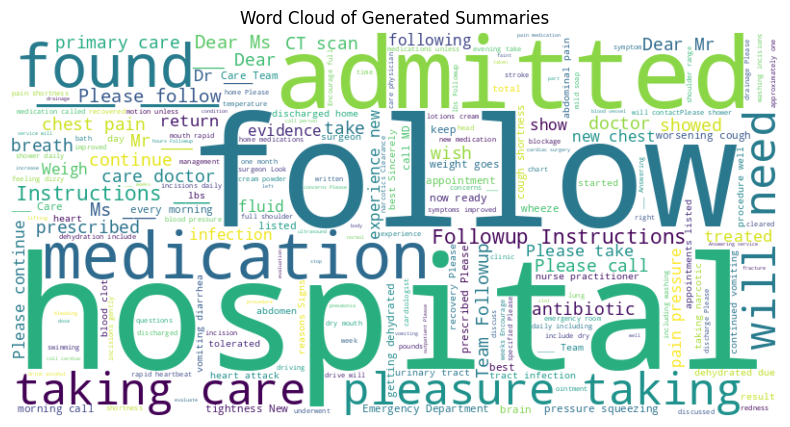

In [ ]:
generated_summaries = []
for text in input_texts[:1000]:
    summary = generate_summary(text, tokenizer, model)
    generated_summaries.append(summary)

generated_summaries_df = pd.DataFrame(generated_summaries, columns=['summary'])

all_summaries_text = ' '.join(generated_summaries)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_summaries_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Generated Summaries')
plt.show()